In [1]:
%matplotlib ipympl
import numpy as np
from numpy.fft import  ifft2, ifftshift
from numpy.random import default_rng as randn
#from scipy.special import kv as beselk
from matplotlib import pyplot as plt
from ipywidgets import interact, widgets
from ows import ows
import time

rad2asec = 3600 * 180/np.pi
asec2rad = 1/rad2asec

## PSD
Power spectrum density

Miminum matrix dimention : 16.079800993793423


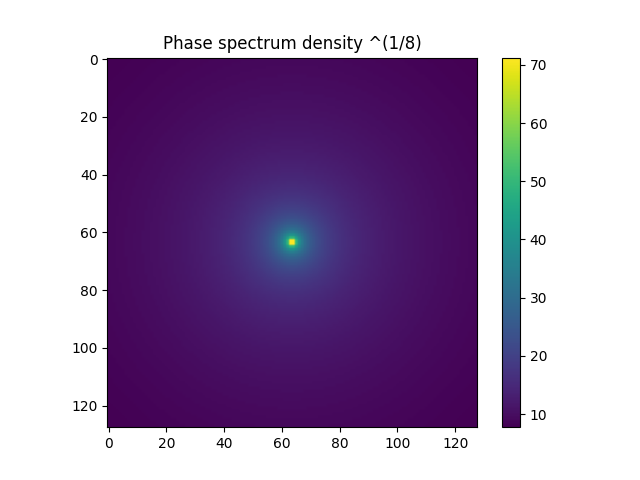

In [8]:
# Input
dimmat = 128
dxp = 0.03222887597610881 # Pupil plane pixel size
r0 = .1
L0 = -1
D = 0.01
wl = 500e-9 # [m]

# Computing limit values
FoV = 25*asec2rad # arcsec
#Npx = 1000 # image plane pixels qty
#Daf = asec2rad*FoV#/Npx # [rad/px]  (Numerical aperture)
Daf = wl/(2*D) # max
dfp = Daf/wl # [/m] Pupil plane spatial frequency pixel size (Numerical aperture/WL)
dimpsf = 8*wl*np.sqrt((D/r0)**2 + 1)/(Daf*D)   # (min psf size) Matrix size
print("Miminum matrix dimention :",dimpsf)
# dimmat = int(dimpsf)+int((dimpsf %1 !=0)*1)
# dimmat += int((dimmat %2 != 0)*1)

if dimmat < dimpsf:
    print(f"dimmat is too small: {dimmat:d}. It souhld be greater than {dimpsf:.1f}")


PSD = ows.psd(dimmat, dxp, r0, wl)
#PSD[dimmat//2-1:dimmat//2+1,dimmat//2-1:dimmat//2+1] = 0
plt.close(1)
plt.figure(1)
plt.imshow(PSD**(1/8))
plt.title("Phase spectrum density ^(1/8)")
plt.colorbar()

## Phase screen

Processingtime : 115.25893211364746 ms


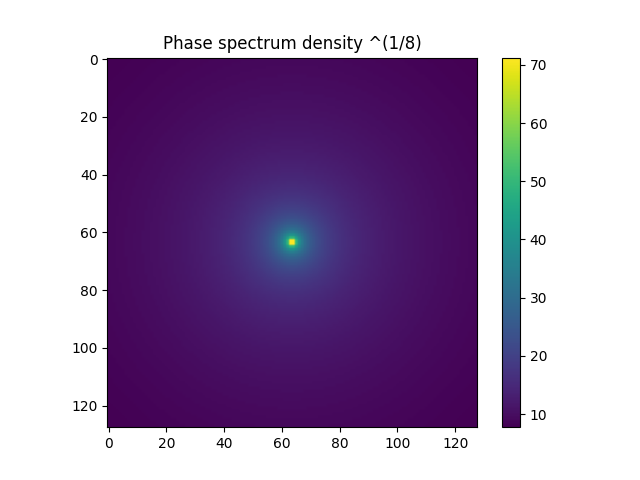

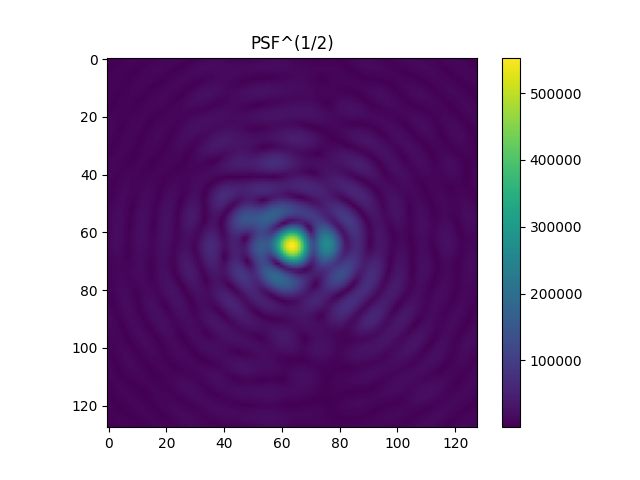

In [9]:
SEED = 1

start = time.time()

[phase_screen, psf] = ows.phase_screen(PSD, dxp, SEED, PUPIL = True)

end = time.time()


print("Processingtime :",
      (end-start) * 10**3, "ms")

# plt.close(4)
# plt.figure(4)
# plt.imshow(phase_screen.real)
# plt.title("phase screen")
# plt.colorbar()

plt.show()
plt.close(5)
plt.figure(5)
plt.imshow((np.abs(psf)**(1/2)))
plt.title("PSF^(1/2)")
plt.colorbar()
plt.show()


In [4]:
from astropy.io import fits

# def normalize(data):
#     min_val = np.min(data)
#     max_val = np.max(data)
#     return (data - min_val) / (max_val - min_val)

# phase_screen_normilized = normalize(phase_screen)
# psf_normalized = normalize(psf)

# fits.writeto('data/phase_screen.fits', phase_screen, overwrite=True)
# fits.writeto('data/phase_screen_normalized.fits', phase_screen_normilized, overwrite=True)
fits.writeto('data/psf.fits', psf, overwrite=True)
# fits.writeto('data/psf_normalized.fits', psf_normalized, overwrite=True)

# input_infos = f"ro,{r0:f},m\nWL,{wl:g},m\ndxp,{dxp:f},\nseed,{1},"
# with open('data/inputs.txt', 'w') as f:
#     f.write(input_infos)

ModuleNotFoundError: No module named 'astropy'